In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = "../data/Train.csv"
df = pd.read_csv(url)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df["Ever_Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [5]:
df.shape

(8068, 11)

In [5]:
df = df.drop(columns = ['Var_1', 'Segmentation', "ID"])

In [7]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [6]:
df.dropna(inplace = True)
df.shape

(6718, 8)

In [7]:
df["Graduated"].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [8]:
gender_map = {"Female": True, "Male": False}
df["Gender"] = df["Gender"].map(gender_map)

In [9]:
def mapeo(df, column):

    map_total = {"Yes": True, "No": False}
    df[column] = df[column].map(map_total)
    return df

In [10]:
mapeo(df, "Ever_Married")
mapeo(df, "Graduated")

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,False,False,22,False,Healthcare,1.0,Low,4.0
2,True,True,67,True,Engineer,1.0,Low,1.0
3,False,True,67,True,Lawyer,0.0,High,2.0
5,False,True,56,False,Artist,0.0,Average,2.0
6,False,False,32,True,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...
8062,False,True,41,True,Artist,0.0,High,5.0
8064,False,False,35,False,Executive,3.0,Low,4.0
8065,True,False,33,True,Healthcare,1.0,Low,1.0
8066,True,False,27,True,Healthcare,1.0,Low,4.0


In [11]:
# One-hot encoding for sex and title
df_dummies = pd.get_dummies(df, columns=["Profession"])
df_dummies

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,False,False,22,False,1.0,Low,4.0,False,False,False,False,False,True,False,False,False
2,True,True,67,True,1.0,Low,1.0,False,False,True,False,False,False,False,False,False
3,False,True,67,True,0.0,High,2.0,False,False,False,False,False,False,False,True,False
5,False,True,56,False,0.0,Average,2.0,True,False,False,False,False,False,False,False,False
6,False,False,32,True,1.0,Low,3.0,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,False,True,41,True,0.0,High,5.0,True,False,False,False,False,False,False,False,False
8064,False,False,35,False,3.0,Low,4.0,False,False,False,False,True,False,False,False,False
8065,True,False,33,True,1.0,Low,1.0,False,False,False,False,False,True,False,False,False
8066,True,False,27,True,1.0,Low,4.0,False,False,False,False,False,True,False,False,False


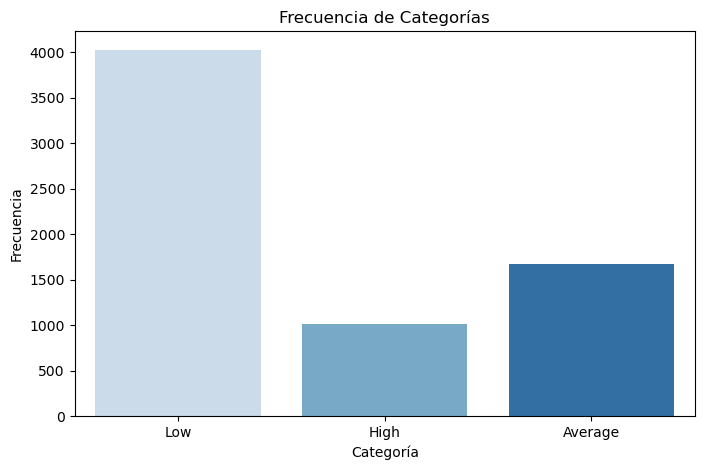

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_dummies, x='Spending_Score', palette='Blues')
plt.title('Frecuencia de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

In [13]:
features = df_dummies.drop('Spending_Score', axis=1)
target = df_dummies['Spending_Score']
features.to_csv('../data/features.csv', index=False)
target.to_csv('../data/target.csv', index=False)

In [14]:
import plotly.express as px
# Calculate the correlation matrix
correlation_matrix = np.abs(features.corr())
# Create the heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Red-Blue diverging color scale
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='')
# Update the layout for better readability
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis={'side': 'top'},  # Move x-axis labels to the top
    width=800,
    height=700
)
# Add correlation values as text annotations
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )
# Show the plot
fig.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
knn = KNeighborsClassifier(n_neighbors=8)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [18]:
pred = knn.predict(X_test) 
pred

array(['Low', 'High', 'Low', ..., 'Average', 'Low', 'Low'], dtype=object)

In [19]:
knn.score(X_test, y_test) 

0.7447916666666666